### EDA 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('AIML Dataset.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataset.shape

(6362620, 11)

In [4]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# Used to find if dataset has any missing values
dataset.isna().sum().any()

False

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
dataset.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
dataset.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
# Finding which categories have most frauds
dfFraudCash_Out = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
dfFraudPayment = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'PAYMENT')]
dfFraudCash_in = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_IN')]
dfFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
dfFraudDebit = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'DEBIT')]
print("Tran. Type\tNo of Frauds")
print(f"Cash-Out\t {len(dfFraudCash_Out)}")
print(f"Payment \t {len(dfFraudPayment)}")
print(f"Cash-in \t {len(dfFraudCash_in)}")
print(f"Transfer \t {len(dfFraudTransfer)}")
print(f"Debit \t         {len(dfFraudDebit)}")

Tran. Type	No of Frauds
Cash-Out	 4116
Payment 	 0
Cash-in 	 0
Transfer 	 4097
Debit 	         0


In [11]:
# we will be taking only these types into our data for analysis as they are the only one which have fraudulent transactions
fraud_cashout = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'CASH_OUT')]
fraud_transfer = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'TRANSFER')]

fraud_cashout.head()
fraud_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


In [12]:
# finding how many not fraudulent transactions cash out and transfers have
dfnotFraudCash_Out = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'CASH_OUT')]
dfnotFraudTransfer = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'TRANSFER')]

print(len(dfnotFraudCash_Out))
print(len(dfnotFraudTransfer))

2233384
528812


In [13]:
#reshaping the data randomly to balance the dataset and reduce overfitting
data1 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'CASH_OUT')].sample(frac=0.002)
data2 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'TRANSFER')].sample(frac=0.008)

In [14]:
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2961264,230,CASH_OUT,28419.23,C649143284,0.0,0.00,C1490573457,147873.96,176293.19,0,0
6078633,518,CASH_OUT,130163.78,C1016236296,0.0,0.00,C1174663259,668888.58,799052.36,0,0
1358078,138,CASH_OUT,24651.75,C739286350,1319.0,0.00,C239973890,53227.47,77879.22,0,0
659334,35,CASH_OUT,106639.42,C1147313733,15500.0,0.00,C457349948,259914.24,285559.85,0,0
864191,42,CASH_OUT,346879.03,C590550378,0.0,0.00,C1244180132,465053.94,997401.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2321483,188,CASH_OUT,165075.18,C199931511,21015.0,0.00,C1822140102,351680.25,516755.43,0,0
3690463,277,CASH_OUT,214399.57,C586583074,3714.0,0.00,C1662266839,24917.07,239316.64,0,0
1544531,154,CASH_OUT,13283.79,C442625882,68075.0,54791.21,C829025043,990657.67,1003941.46,0,0
2880615,228,CASH_OUT,271326.22,C521971604,0.0,0.00,C1671752615,9886462.46,10157788.68,0,0


In [15]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
443544,19,TRANSFER,47885.11,C1534830175,198577.00,150691.89,C1088995938,0.00,47885.11,0,0
5817100,401,TRANSFER,1152294.62,C1961602013,244509.32,0.00,C1157099915,5718524.14,6870818.76,0,0
4775183,335,TRANSFER,614462.92,C1976069940,0.00,0.00,C1996890271,10552580.66,11167043.58,0,0
3597567,263,TRANSFER,216187.80,C960755382,11731.54,0.00,C1426198354,217202.47,433390.27,0,0
2244532,186,TRANSFER,593425.10,C463724103,10780.00,0.00,C976933169,742282.81,1335707.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39734,9,TRANSFER,1382467.78,C1253090203,101.00,0.00,C1638345617,0.00,2043512.68,0,0
1163982,132,TRANSFER,125924.43,C614259876,0.00,0.00,C1631845826,155060.47,280984.90,0,0
409823,18,TRANSFER,1565475.45,C1840943617,1537.00,0.00,C236174218,2338763.94,3986514.19,0,0
5577413,393,TRANSFER,3298367.55,C433363962,3084.00,0.00,C1559661659,746635.61,4045003.17,0,0


In [16]:
# creating our data set by concatenating the segregated data frames
fraud_data = pd.concat([data1,fraud_cashout, data2, fraud_transfer])
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2961264,230,CASH_OUT,28419.23,C649143284,0.00,0.0,C1490573457,147873.96,176293.19,0,0
6078633,518,CASH_OUT,130163.78,C1016236296,0.00,0.0,C1174663259,668888.58,799052.36,0,0
1358078,138,CASH_OUT,24651.75,C739286350,1319.00,0.0,C239973890,53227.47,77879.22,0,0
659334,35,CASH_OUT,106639.42,C1147313733,15500.00,0.0,C457349948,259914.24,285559.85,0,0
864191,42,CASH_OUT,346879.03,C590550378,0.00,0.0,C1244180132,465053.94,997401.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [17]:
fraud_data.isFraud.sum()

8213

Now, column **type** is Categorical object which we convert into Numerical Data to apply operations on it

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(fraud_data['type'])
label

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
# Inserting converted type data into our dataset
fraud_data.insert(2,'type_num', label)

In [20]:
# Converting nameOrig column into only ids by removing C from its front
fraud_data['nameOrig'] = fraud_data['nameOrig'].replace({'C': ''}, regex=True)
fraud_data

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2961264,230,CASH_OUT,0,28419.23,649143284,0.00,0.0,C1490573457,147873.96,176293.19,0,0
6078633,518,CASH_OUT,0,130163.78,1016236296,0.00,0.0,C1174663259,668888.58,799052.36,0,0
1358078,138,CASH_OUT,0,24651.75,739286350,1319.00,0.0,C239973890,53227.47,77879.22,0,0
659334,35,CASH_OUT,0,106639.42,1147313733,15500.00,0.0,C457349948,259914.24,285559.85,0,0
864191,42,CASH_OUT,0,346879.03,590550378,0.00,0.0,C1244180132,465053.94,997401.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,1,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1,1258818.82,1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,1,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,1,6311409.28,1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [21]:
fraud_data['nameOrig'] = pd.to_numeric(fraud_data['nameOrig'])
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 2961264 to 6362618
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16910 non-null  int64  
 1   type            16910 non-null  object 
 2   type_num        16910 non-null  int32  
 3   amount          16910 non-null  float64
 4   nameOrig        16910 non-null  int64  
 5   oldbalanceOrg   16910 non-null  float64
 6   newbalanceOrig  16910 non-null  float64
 7   nameDest        16910 non-null  object 
 8   oldbalanceDest  16910 non-null  float64
 9   newbalanceDest  16910 non-null  float64
 10  isFraud         16910 non-null  int64  
 11  isFlaggedFraud  16910 non-null  int64  
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 1.6+ MB


### Feature Selection

Columns **step, nameDest, type and isFlaggedFraud** are not taken into consideration for training our prediction models because
column **nameDest** is string which are not providing any significance to our data, **type** column is dropped because we already converted it into numerical data and **isFlaggedFraud** is removed because we believe that it is the pre determined output which needs to be found out by the model. Also **step** is just hour out of 30 days of simulation

In [22]:
fraud_data = fraud_data.drop(['step','nameDest', 'type','isFlaggedFraud'], axis=1)

In [23]:
fraud_data

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2961264,0,28419.23,649143284,0.00,0.0,147873.96,176293.19,0
6078633,0,130163.78,1016236296,0.00,0.0,668888.58,799052.36,0
1358078,0,24651.75,739286350,1319.00,0.0,53227.47,77879.22,0
659334,0,106639.42,1147313733,15500.00,0.0,259914.24,285559.85,0
864191,0,346879.03,590550378,0.00,0.0,465053.94,997401.73,0
...,...,...,...,...,...,...,...,...
6362610,1,63416.99,778071008,63416.99,0.0,0.00,0.00,1
6362612,1,1258818.82,1531301470,1258818.82,0.0,0.00,0.00,1
6362614,1,339682.13,2013999242,339682.13,0.0,0.00,0.00,1
6362616,1,6311409.28,1529008245,6311409.28,0.0,0.00,0.00,1


In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 2961264 to 6362618
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type_num        16910 non-null  int32  
 1   amount          16910 non-null  float64
 2   nameOrig        16910 non-null  int64  
 3   oldbalanceOrg   16910 non-null  float64
 4   newbalanceOrig  16910 non-null  float64
 5   oldbalanceDest  16910 non-null  float64
 6   newbalanceDest  16910 non-null  float64
 7   isFraud         16910 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 1.1 MB


In [25]:
fraud_data.to_csv('fraud_data_final.csv')

In [26]:
fraud_data.describe()

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,16910.000000,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,16910.000000
mean,0.492431,9.753199e+05,1.078867e+09,8.226803e+05,9.983162e+04,1.314588e+06,1.952023e+06,0.485689
std,0.499957,1.979231e+06,6.207252e+08,2.601141e+06,1.373949e+06,4.246366e+06,4.920873e+06,0.499810
min,0.000000,0.000000e+00,1.453640e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.136146e+05,5.417227e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.377643e+04,0.000000
50%,0.000000,2.892364e+05,1.080607e+09,5.758867e+04,0.000000e+00,1.620005e+05,5.927651e+05,0.000000
75%,1.000000,8.371839e+05,1.615770e+09,4.449927e+05,0.000000e+00,1.120136e+06,2.045703e+06,1.000000
max,1.000000,4.872410e+07,2.147314e+09,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [27]:
# Assigning values
X = fraud_data.iloc[:, :-1].values
y = fraud_data.iloc[:, -1].values

In [28]:
X

array([[0.00000000e+00, 2.84192300e+04, 6.49143284e+08, ...,
        0.00000000e+00, 1.47873960e+05, 1.76293190e+05],
       [0.00000000e+00, 1.30163780e+05, 1.01623630e+09, ...,
        0.00000000e+00, 6.68888580e+05, 7.99052360e+05],
       [0.00000000e+00, 2.46517500e+04, 7.39286350e+08, ...,
        0.00000000e+00, 5.32274700e+04, 7.78792200e+04],
       ...,
       [1.00000000e+00, 3.39682130e+05, 2.01399924e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.31140928e+06, 1.52900824e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 1.68599504e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Splitting data into train and test set and also apply Feature Scaling

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Logistic Regression Model on training set

In [32]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


#### Making the Confusion Matrix

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2028  127]
 [ 300 1773]]
Accuracy of model: 0.8990066225165563


#### Recall Calculation

In [35]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8552821997105644


#### F1 Score Calculation

In [36]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8925245406493834


### Training on SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2030  125]
 [ 304 1769]]
Accuracy of model: 0.8985335856196783


In [40]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8533526290400386


In [41]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8918578270733551


### Training on Naive bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = bayes.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2094   61]
 [1062 1011]]
Accuracy of model: 0.7343897824030274


In [45]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.487698986975398


In [46]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.6429252782193958


### Decision Tree

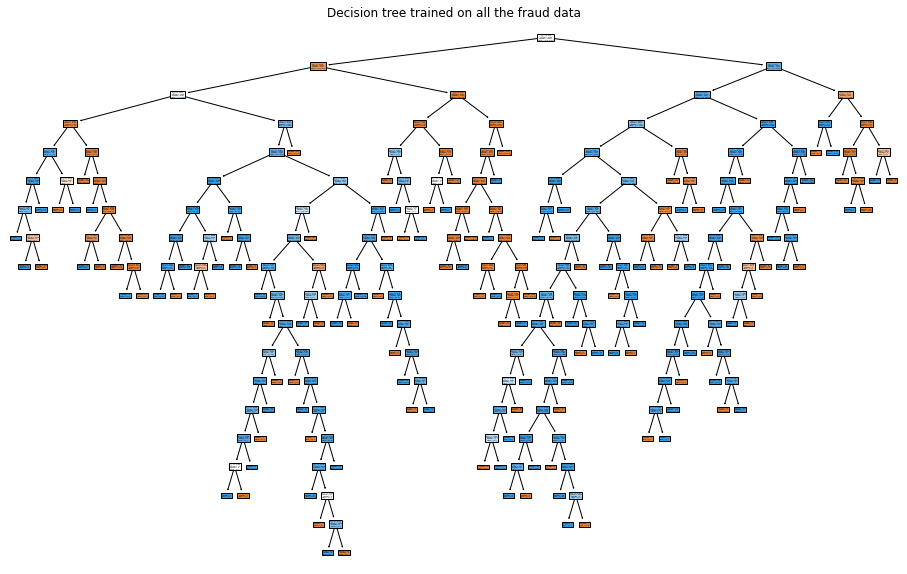

In [47]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dr.fit(X_train, y_train)
fig = plt.figure(figsize=(16,10))
tree.plot_tree(dr, filled=True)
plt.title("Decision tree trained on all the fraud data")
plt.show()

In [48]:
# fig.savefig("decistion_tree.png")

In [49]:
y_pred = dr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2135   20]
 [  23 2050]]
Accuracy of model: 0.9898297067171239


In [51]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.9889049686444766


In [52]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9896210475500845


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [54]:
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2120   35]
 [  13 2060]]
Accuracy of model: 0.988647114474929


In [56]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.9937288953207911


In [57]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9884836852207294


### Training with Kernel SVM

In [58]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf', random_state = 0)
kernel_svm.fit(X_train, y_train)

SVC(random_state=0)

In [59]:
y_pred = kernel_svm.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2052  103]
 [ 384 1689]]


0.8848155156102177

In [61]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8147612156295224


In [62]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8739974126778784


### Our Model Analysis

*   Decision Tree Classifier showed the highest recall, accuracyy and F1 score when compared to others:
*   **Recall - 99.1799 % | Acc - 99.124 % | f1 - 99.108 %**
*   **Rejecting other networks because:**
*   Neural Networks are rejected because it obviously takes a LOT of training time & computation power
*   Performance of other models that were tested are:
 ________________________________________________
| Model               |  Recall(%)  |  F1(%)     |
|---------------------|-------------|----------- |
| **Decision Tree**   | **99.1799** | **99.108** |
| Logistic Regression |   85.721    |   88.7021  |
| SVM                 |   84.02     |   88       |
| Naive bayes         |   46        |   88       |
| Kernel SVM          |   81.478    |   87.06    |
-------------------------------------------------

### Predicting a single input

In [63]:
# type_num	amount	nameOrig	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest
# print(classifier.predict(sc.transform([[0,74445.62,1796046115,0.00,0.0,1371784.99,1446230.61]])))

print(dr.predict([[1,34518.82,356646316,0.0,0.0,851831.14,886349.96],
               [1,278568.31,912325874,0.0,0.0,641896.48,920464.79],
               [1,475369.51,1184256533,0.0,0.0,1201817.38,1677186.90],
               [1,475368.94,916986889,475368.94,0.0,1348026.73,1823395.67],
               [1,594471.04,1345990968,594471.04,0.0,1788456.17,2382927.21]]))

[0 0 0 0 0]


We can see from above prediction that it came up with correct prediction for the above query

### Saving our model

In [64]:
import pickle

# Dumping our model into a file
with open('fraud_model4.bin', 'wb') as f_out:
    pickle.dump(dr, f_out)

### Trying our pickle model

In [65]:
with open('fraud_model4.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [66]:
# predicting the single value which we predicted before
# predict_mpg(sc.transform([[3, 14650.1, 908817173, 19373.0, 4722.9, 0.0, 0.0,]]), model)

model.predict([[1,34518.82,356646316,0.0,0.0,851831.14,886349.96],
               [1,278568.31,912325874,0.0,0.0,641896.48,920464.79],
               [1,475369.51,1184256533,0.0,0.0,1201817.38,1677186.90],
               [1,475368.94,916986889,475368.94,0.0,1348026.73,1823395.67],
               [1,594471.04,1345990968,594471.04,0.0,1788456.17,2382927.21]])

array([0, 0, 0, 0, 0], dtype=int64)

It gives the same result from before, it means our model is working fine